# Analyzing the Impact of Education on Income

In [99]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction
We often hear that higher levels of education are necessary to achieve higher levels of income. This information is important for policy makers as they shape regulations in an attempt to strengthen the workforce and the economy. 

Using data from the US Census, I will explore how education impacts income, occupation, and capital gains. My hypothesis is that more education is correlated with "white collar" occupations, higher income, and more capital gains. Further, I will explore how we might use a machine learning model to predict occupation, income, and capital gains based on education.

## Data
This data comes from https://www.kaggle.com/johnolafenwa/us-census-data

US Adult Census data relating income to social factors such as Age, Education, race etc.

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: workclass, education, maritalstatus, occupation, relationship, race, gender, nativecountry

The continuous columns are: age, educationnum, capitalgain, capitalloss, hoursper_week

This Dataset was obtained from the UCI repository, it can be found on

https://archive.ics.uci.edu/ml/datasets/census+income,
http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

## Methodology
I explored the dataset using a variety of basic exploratory data analysis techniques. I found little correlation between any of the continuous variables. 

For the categorical variables, I found that:
1. Most workers make less than 50K
2. Most workers are from the U.S.
3. Most workers are husbands or not in family
4. Most workers are male
5. Most workers are white
6. Workers are in a wide variety of occupations
7. Most workers are in the private sector
8. Most workers are married or never married
9. Most workers have a HS grad, bacehlors, or some college
10. Most workers are between the ages of 18 and 50
11. Most workers have low capital gains
12. Most workers have zero capital loss
13. Most workers have 8-15 years of education
14. Most workers work 40 hours per week

I'd like to understand the impact of the variables in this dataset on income. In order to investigate that impact, I will do two things:
1. Regress relationships between the different variables and income 
2. Build a KNN classification model to predict which income category a person is in

In [177]:
df=pd.read_csv("C:/Users/kylec/OneDrive/Desktop/Coursera/us_adult_income.csv")

In [178]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [179]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [180]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

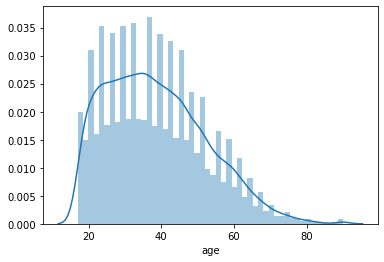

In [181]:
sns.distplot(df['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0671D42E0>,
      dtype=object)

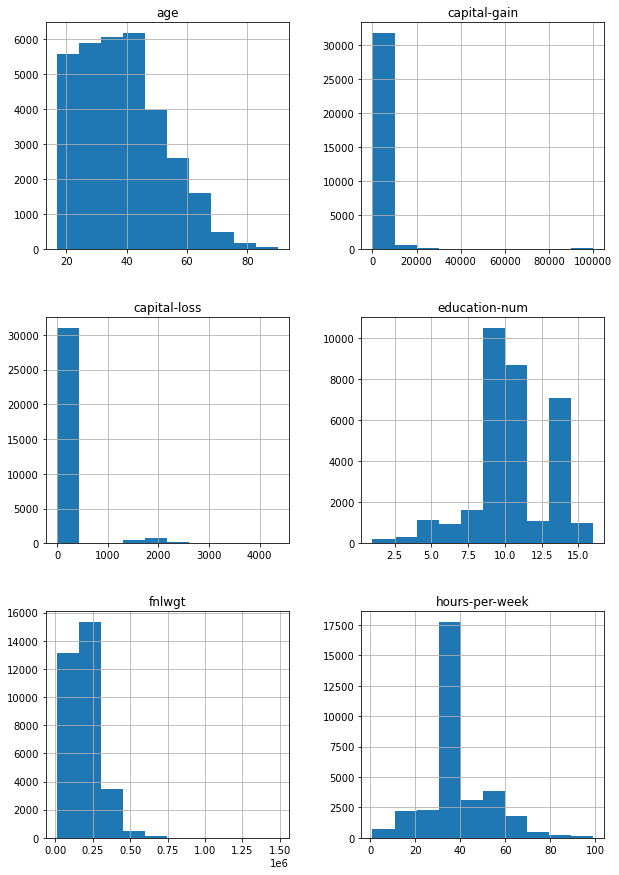

In [17]:
df.hist(figsize=(10,15))

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

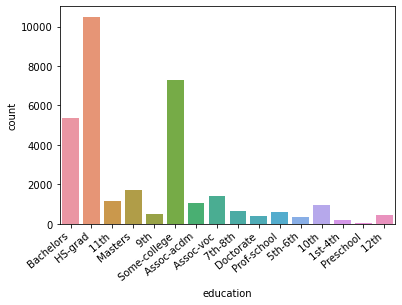

In [182]:
#Most workers have a HS grad, bacehlors, or some college
ax1=sns.countplot(df['education'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Never-married'),
 Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse'),
 Text(0, 0, ' Widowed')]

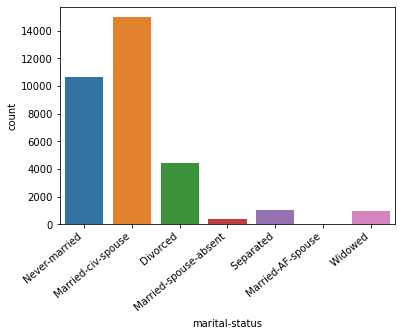

In [28]:
#Most workers are married or never married
ax3 = sns.countplot(df['marital-status'])
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

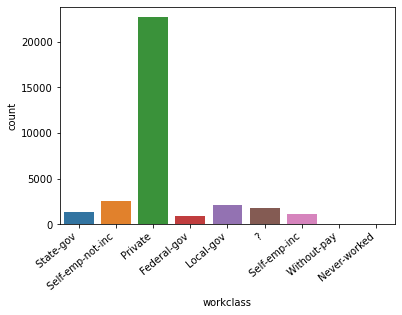

In [29]:
#Most workers are in the private sector
ax2 = sns.countplot(df['workclass'])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

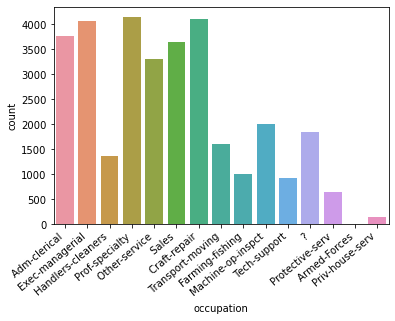

In [30]:
#Workers are in a wide variety of occupations
ax4 = sns.countplot(df['occupation'])
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' White'),
 Text(0, 0, ' Black'),
 Text(0, 0, ' Asian-Pac-Islander'),
 Text(0, 0, ' Amer-Indian-Eskimo'),
 Text(0, 0, ' Other')]

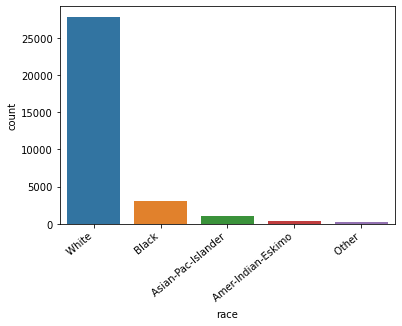

In [32]:
#Most workers are white
ax5 = sns.countplot(df['race'])
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Male'), Text(0, 0, ' Female')]

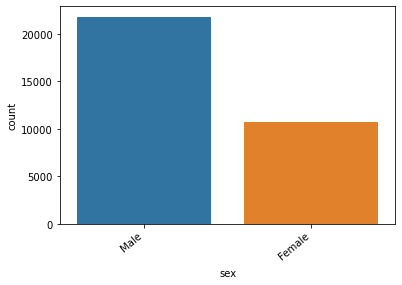

In [33]:
#Most workers are male
ax6 = sns.countplot(df['sex'])
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Not-in-family'),
 Text(0, 0, ' Husband'),
 Text(0, 0, ' Wife'),
 Text(0, 0, ' Own-child'),
 Text(0, 0, ' Unmarried'),
 Text(0, 0, ' Other-relative')]

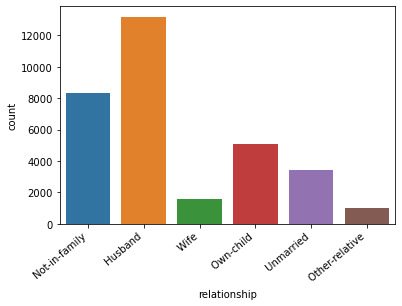

In [34]:
#Most workers are husbands or not in family
ax7 = sns.countplot(df['relationship'])
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' United-States'),
 Text(0, 0, ' Cuba'),
 Text(0, 0, ' Jamaica'),
 Text(0, 0, ' India'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Mexico'),
 Text(0, 0, ' South'),
 Text(0, 0, ' Puerto-Rico'),
 Text(0, 0, ' Honduras'),
 Text(0, 0, ' England'),
 Text(0, 0, ' Canada'),
 Text(0, 0, ' Germany'),
 Text(0, 0, ' Iran'),
 Text(0, 0, ' Philippines'),
 Text(0, 0, ' Italy'),
 Text(0, 0, ' Poland'),
 Text(0, 0, ' Columbia'),
 Text(0, 0, ' Cambodia'),
 Text(0, 0, ' Thailand'),
 Text(0, 0, ' Ecuador'),
 Text(0, 0, ' Laos'),
 Text(0, 0, ' Taiwan'),
 Text(0, 0, ' Haiti'),
 Text(0, 0, ' Portugal'),
 Text(0, 0, ' Dominican-Republic'),
 Text(0, 0, ' El-Salvador'),
 Text(0, 0, ' France'),
 Text(0, 0, ' Guatemala'),
 Text(0, 0, ' China'),
 Text(0, 0, ' Japan'),
 Text(0, 0, ' Yugoslavia'),
 Text(0, 0, ' Peru'),
 Text(0, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, ' Scotland'),
 Text(0, 0, ' Trinadad&Tobago'),
 Text(0, 0, ' Greece'),
 Text(0, 0, ' Nicaragua'),
 Text(0, 0, ' Vietnam'),
 Text(0, 0, ' Hon

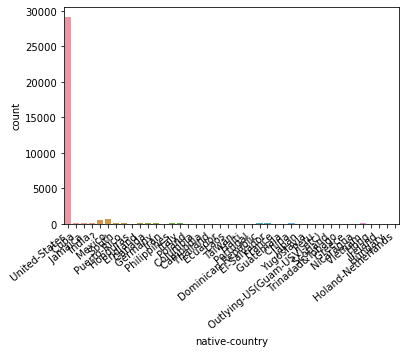

In [35]:
#Most workers are from the U.S.
ax8 = sns.countplot(df['native-country'])
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' <=50K'), Text(0, 0, ' >50K')]

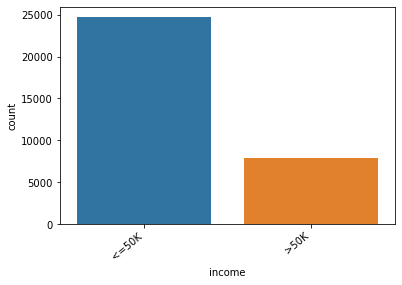

In [36]:
#Most workers make less than 50K
ax8 = sns.countplot(df['income'])
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=40, ha="right")

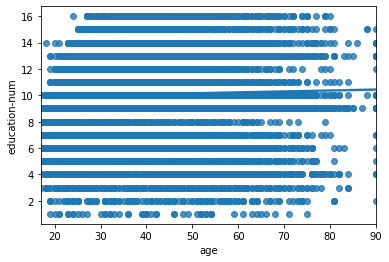

In [37]:
sns.regplot(df['age'],df['education-num'])

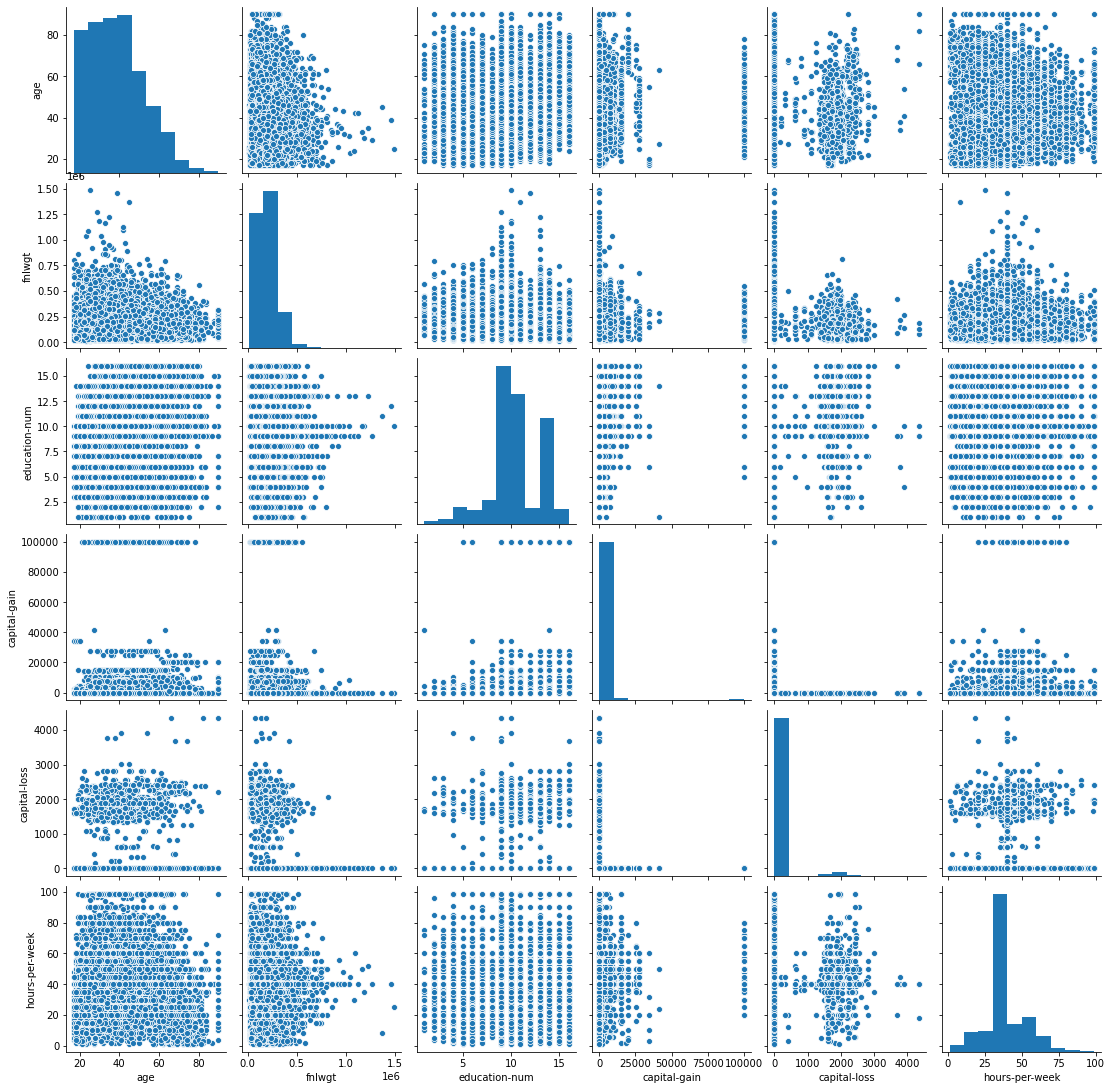

In [38]:
sns.pairplot(df)

In [187]:
df.duplicated().sum()

0

In [184]:
df[df.duplicated()==True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [185]:
df.drop_duplicates(inplace=True)

In [186]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
np.round(df.corr(),2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.04,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02
education-num,0.04,-0.04,1.00,0.12,0.08,0.15
capital-gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital-loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.15,0.08,0.05,1.00


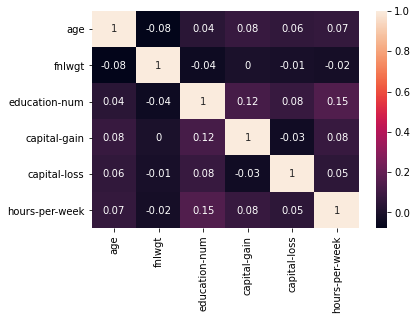

In [48]:
sns.heatmap(np.round(df.corr(),2),annot=True)

In [56]:
dfgrp = round(df.groupby(['education'], as_index=False).mean(),2)

In [57]:
dfgrp

,education,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,10th,37.43,196832.47,6.0,404.57,56.85,37.05
1,11th,32.36,194928.08,7.0,215.10,50.08,33.93
2,12th,32.00,199097.51,8.0,284.09,32.34,35.78
3,1st-4th,46.40,239824.80,2.0,127.39,48.91,38.23
4,5th-6th,42.95,232425.17,3.0,176.55,68.46,38.85
5,7th-8th,48.44,188322.29,4.0,234.30,65.77,39.37
6,9th,41.06,202485.07,5.0,342.09,29.00,38.04
7,Assoc-acdm,37.38,193424.09,12.0,640.40,93.42,40.50
8,Assoc-voc,38.55,181936.02,11.0,715.05,72.75,41.61
9,Bachelors,38.91,187999.91,13.0,1756.96,118.39,42.61


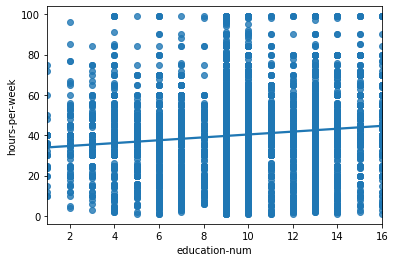

In [59]:
sns.regplot(df['education-num'],df['hours-per-week'])

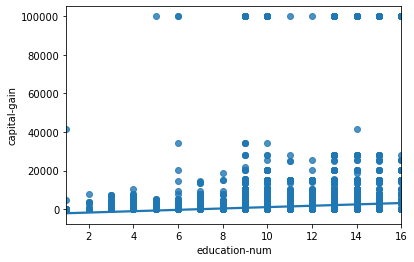

In [60]:
sns.regplot(df['education-num'],df['capital-gain'])

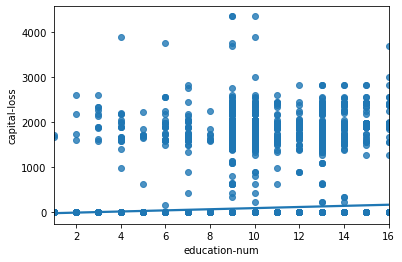

In [61]:
sns.regplot(df['education-num'],df['capital-loss'])

In [68]:
#We need to change our categorical variables to integer in order to plot them.
#workclass         object
#education         object - don't need to do this one because we already have education numbers
#marital-status    object
#occupation        object
#relationship      object
#race              object
#sex               object
#native-country    object
#income            object

df = pd.get_dummies(df, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country','income'],drop_first=True)

In [69]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support

In [73]:
df.drop(['fnlwgt','relationship_ Not-in-family','relationship_ Other-relative', 'relationship_ Own-child','relationship_ Unmarried', 'relationship_ Wife', 'native-country_ Cambodia', 'native-country_ Canada',       'native-country_ China', 'native-country_ Columbia',
       'native-country_ Cuba', 'native-country_ Dominican-Republic',       'native-country_ Ecuador', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ France',       'native-country_ Germany', 'native-country_ Greece',
       'native-country_ Guatemala', 'native-country_ Haiti',       'native-country_ Holand-Netherlands', 'native-country_ Honduras',
       'native-country_ Hong', 'native-country_ Hungary',       'native-country_ India', 'native-country_ Iran',
       'native-country_ Ireland', 'native-country_ Italy',       'native-country_ Jamaica', 'native-country_ Japan',
       'native-country_ Laos', 'native-country_ Mexico',       'native-country_ Nicaragua',
       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Peru',       'native-country_ Philippines', 'native-country_ Poland',
       'native-country_ Portugal', 'native-country_ Puerto-Rico',       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',       'native-country_ Trinadad&Tobago','native-country_ Vietnam', 'native-country_ Yugoslavia'],axis=1,inplace=True)

In [74]:
df

,age,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ United-States,income_ >50K
0,39,Bachelors,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,50,Bachelors,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,38,HS-grad,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,53,11th,7,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,28,Bachelors,13,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,0,0,38,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
32557,40,HS-grad,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
32558,58,HS-grad,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
32559,22,HS-grad,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0


In [75]:
df.columns

Index(['age', 'education', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       

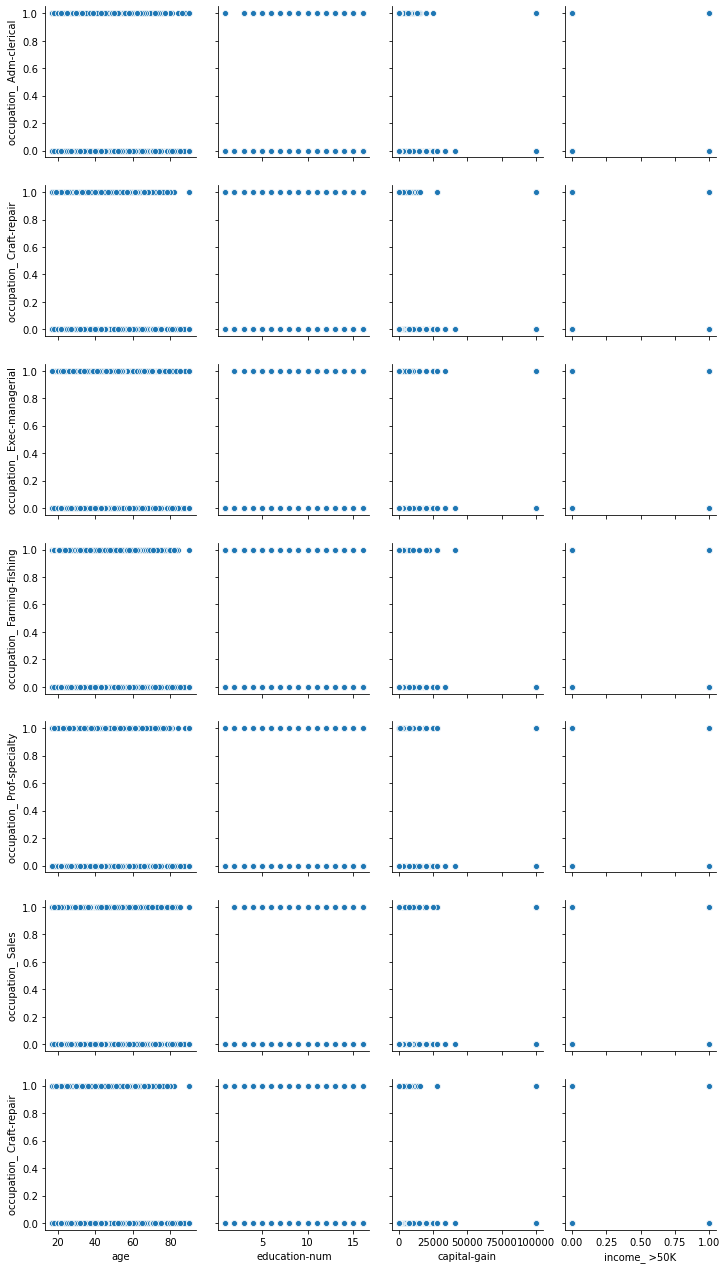

In [79]:
sns.pairplot(
    df,
    x_vars=["age","education-num","capital-gain","income_ >50K"],
    y_vars=["occupation_ Adm-clerical","occupation_ Craft-repair","occupation_ Exec-managerial","occupation_ Farming-fishing","occupation_ Prof-specialty","occupation_ Sales","occupation_ Craft-repair"],) 

In [81]:
df.drop(['marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed'],axis=1,inplace=True)

In [153]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support

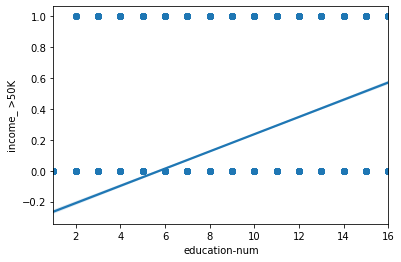

In [84]:
sns.regplot(df['education-num'],df['income_ >50K'])

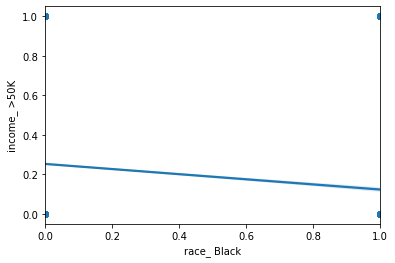

In [85]:
sns.regplot(df['race_ Black'],df['income_ >50K'])

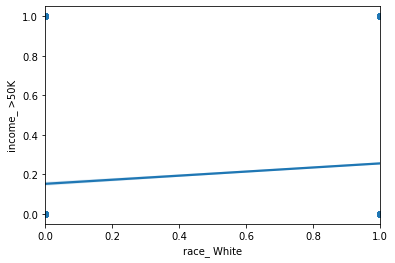

In [86]:
sns.regplot(df['race_ White'],df['income_ >50K'])

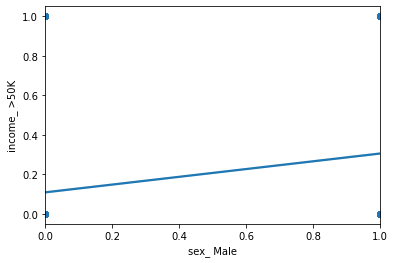

In [87]:
sns.regplot(df['sex_ Male'],df['income_ >50K'])

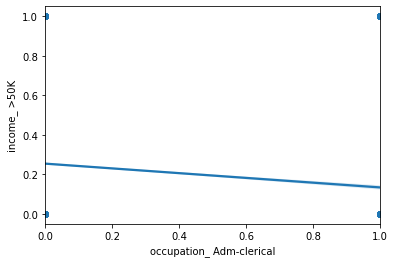

In [91]:
#"occupation_ Adm-clerical","occupation_ Craft-repair","occupation_ Exec-managerial","occupation_ Farming-fishing","occupation_ Prof-specialty","occupation_ Sales"

sns.regplot(df['occupation_ Adm-clerical'],df['income_ >50K'])

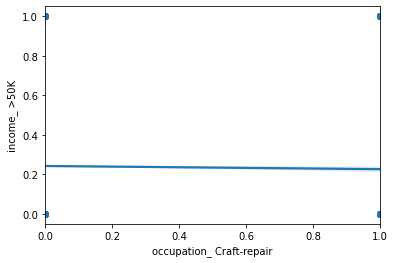

In [92]:
sns.regplot(df['occupation_ Craft-repair'],df['income_ >50K'])

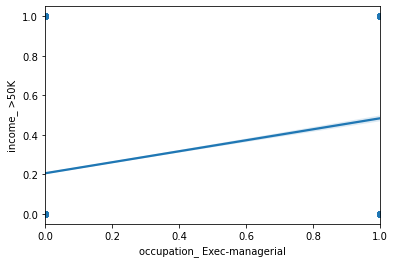

In [93]:
sns.regplot(df['occupation_ Exec-managerial'],df['income_ >50K'])

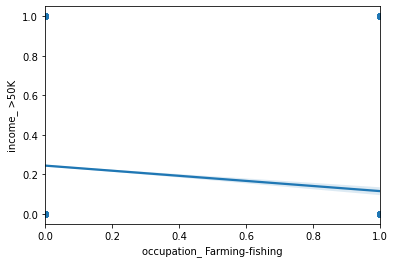

In [94]:
sns.regplot(df['occupation_ Farming-fishing'],df['income_ >50K'])

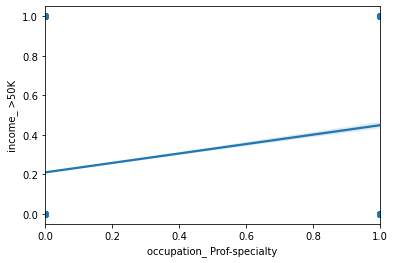

In [95]:
sns.regplot(df['occupation_ Prof-specialty'],df['income_ >50K'])

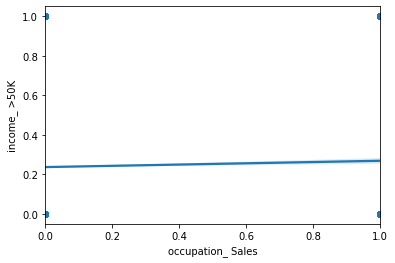

In [96]:
sns.regplot(df['occupation_ Sales'],df['income_ >50K'])

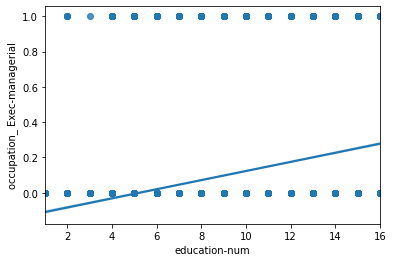

In [147]:
sns.regplot(df['education-num'],df['occupation_ Exec-managerial'])

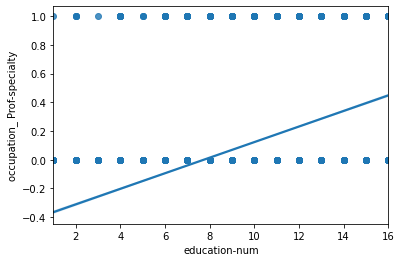

In [148]:
sns.regplot(df['education-num'],df['occupation_ Prof-specialty'])

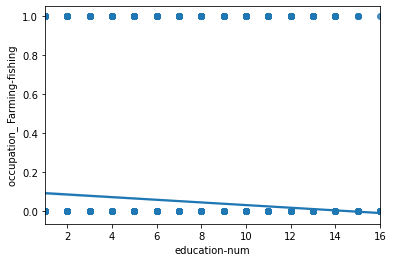

In [150]:
sns.regplot(df['education-num'],df['occupation_ Farming-fishing'])

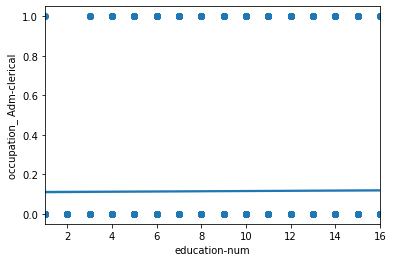

In [149]:
sns.regplot(df['education-num'],df['occupation_ Adm-clerical'])

In [100]:
#I'm going to re-import the dataset and reset the dummary variables so we can train the ML model on all variables.

df=pd.read_csv("C:/Users/kylec/OneDrive/Desktop/Coursera/us_adult_income.csv")

In [101]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df = pd.get_dummies(df, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country','income'],drop_first=True)

In [103]:
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,Bachelors,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,Bachelors,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,HS-grad,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,11th,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,Bachelors,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support

In [108]:
#Now let's build our KNN model.
X = df[['age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male', 'native-country_ Cambodia', 'native-country_ Canada',
       'native-country_ China', 'native-country_ Columbia',
       'native-country_ Cuba', 'native-country_ Dominican-Republic',
       'native-country_ Ecuador', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ France',
       'native-country_ Germany', 'native-country_ Greece',
       'native-country_ Guatemala', 'native-country_ Haiti',
       'native-country_ Holand-Netherlands', 'native-country_ Honduras',
       'native-country_ Hong', 'native-country_ Hungary',
       'native-country_ India', 'native-country_ Iran',
       'native-country_ Ireland', 'native-country_ Italy',
       'native-country_ Jamaica', 'native-country_ Japan',
       'native-country_ Laos', 'native-country_ Mexico',
       'native-country_ Nicaragua',
       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Peru',
       'native-country_ Philippines', 'native-country_ Poland',
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia']].values

In [109]:
X[0:5]

array([[    39,  77516,     13,   2174,      0,     40,      0,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             0,      1,      0,      0,      1,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      1,      0,      0,      0,      0,      0,
             0,      0,      1,      1,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      1,      0,      0],
       [    50,  83311,     13,      0,      0,     13,      0,      0,
             0,      0,      0,      1,      0,      0,      0,      1,
             0,      0,      0,      0,      0,      0,      0,      1,
             0,

In [111]:
#Set the y value
y = df['income_ >50K'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [114]:
#Normalize the data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 3.06705574e-02, -1.06361075e+00,  1.13473876e+00,
         1.48452895e-01, -2.16659527e-01, -3.54294470e-02,
        -1.74295110e-01, -2.62097357e-01, -1.46638105e-02,
        -1.51679230e+00, -1.88389328e-01, -2.90935682e-01,
         4.90769968e+00, -2.07399897e-02, -2.65869483e-02,
        -9.22840678e-01, -1.14036778e-01,  1.43105786e+00,
        -1.80284599e-01, -1.77358126e-01,  2.76348874e+00,
        -1.66277090e-02, -3.79495169e-01, -3.77745550e-01,
        -1.77450218e-01, -2.09577972e-01, -2.55954322e-01,
        -3.35541333e-01, -6.78016432e-02, -3.81663381e-01,
        -1.42608475e-01, -3.55316091e-01, -1.71278873e-01,
        -2.27103553e-01,  1.70899099e+00, -1.76249722e-01,
        -4.29345818e-01, -3.44032316e-01, -2.24926808e-01,
        -1.81551939e-01, -3.25768238e-01, -9.16116326e-02,
         4.13019703e-01,  7.03071345e-01, -2.41632129e-02,
        -6.10734231e-02, -4.80487962e-02, -4.26060196e-02,
        -5.40937900e-02, -4.64159754e-02, -2.93370850e-0

In [116]:
#Do a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (26048, 85) (26048,)
Test set: (6513, 85) (6513,)


In [140]:
#Import KNN, set the K value, train the model
from sklearn.neighbors import KNeighborsClassifier
k=6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [141]:
#Use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [142]:
#Check the accuracy
from sklearn import metrics
print("Train", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test", metrics.accuracy_score(y_test, yhat))

Train 0.8674754299754299
Test 0.8303393213572854


In [138]:
#Check to see which K value is optimal
from sklearn.neighbors import KNeighborsClassifier

scores = []

for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, yhat))

print(scores)

[0.793489943190542, 0.8134500230308613, 0.8172884999232305, 0.8257331490864425, 0.8232765238753262, 0.8303393213572854, 0.8231229847996315, 0.8289574696760326, 0.8292645478274221]


Text(0, 0.5, 'Testing Accuracy')

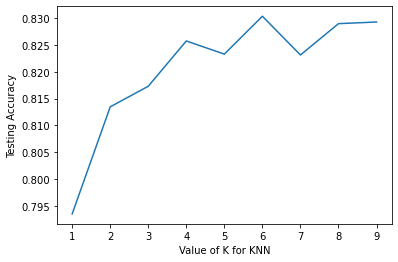

In [139]:
#Map out which K value is optimal. It looks like the answer is K=6
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [165]:
#Evaluate the model
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print('Jaccard Similarity Score:',jaccard_score(y_test,yhat))
print('F1 Score:', f1_score(y_test, yhat, average='weighted'))
print('Confusion matrix:', metrics.confusion_matrix(y_test, yhat))


Jaccard Similarity Score: 0.4109808102345416
F1 Score: 0.8199539303263842
Confusion matrix: [[4637  335]
 [ 770  771]]
